In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#linalg represents linear algebra which is present in both scipy and numpy
#eig represents Eigen method that can be used for the generation of Eigne value and Eigen Vector
from scipy.linalg import eig 
from numpy.linalg import eig

In [3]:
#Creating a 2D array for implementation purpose

data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [4]:
#Displaying the Input data

data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [7]:
#Converting data into data frame with column name "Math" and "Bio"

df=pd.DataFrame(data,columns=["Math","Bio"])

In [8]:
#Displaying the transformed data frame

df

,Math,Bio
0,3,4
1,2,8
2,6,9
3,10,12


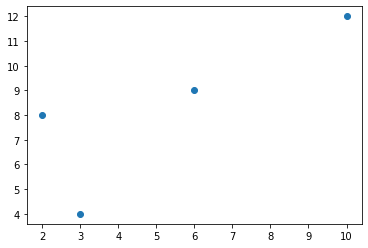

In [9]:
#Visualizing the dataset using scatter plot

plt.scatter(df["Math"],df["Bio"])

In [ ]:
#Steps to find the PCA (Principal Component)

1. stadarization of the data
2. find cov matrix from the data
3. eig value and eig vector
4. find the principle component

# Step 1 = Standardizing the dataset

In [12]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [13]:
#Standardization manually without using any pre defined library like StandardScaler()

(3+2+6+10)/4    #Average of first column

5.25

In [14]:
(4+8+9+12)/4    #Average of second column

8.25

In [10]:
#Calculating the meana down the each column

meanbycol=np.mean(data,axis=0)

In [11]:
#Displaying the calculated mean

meanbycol

array([5.25, 8.25])

In [ ]:
# Next we will calculate the difference of mean and data = data - mean

In [16]:
scaled_data=data-meanbycol

In [17]:
scaled_data    #Difference of data and mean

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [23]:
stdbycol=np.std(data,axis=0)   #Applying the standard deviation on the different of data and mean

In [25]:
#Dividing the scaled_data representing the difference of data and mean with standard deviation of data.
#This will give the standarized dataset or target scalled dataset that can be taken forward

scaled_data=scaled_data/stdbycol

In [26]:
scaled_data  #Displaying the final scalled dataset

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [22]:
#Generation of scalled dataset can be also done directly using StandardScaler

from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit_transform(df)
#Observe the scalled data that we are getting by applying StandardScaler() method. This proves that
#Scalled dataset produced by applying StandardScaler() and when generated manually(using difference of
#data and mean followed by division with standard deviation) will generate the same results.

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [27]:
#For the calculation of covariance Eigen Vector and all further calculation we would need to take the 
#transpose of the resultant scaled dataset

scaled_data.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

# Step 2 = Finding the covariance matrix

In [31]:
cov_mat=np.cov(scaled_data.T)  #using np.cov() to generate the covariance matrix

In [32]:
cov_mat  #Displaying the covariance matrix

#Please note that since we have taken input dataset consisting of 2 features so that is the reason why
#we are getting the covariance matrix with dimension 2. Also Covariance matrix is a square matrix

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

# Step 3 = Finding the Eigen Value and Eigen Vector

In [35]:
eig_value,eig_vector=eig(cov_mat) #Using eig() imported from scipy.linalg or numpy.linalg

In [36]:
eig_vector  #Displaying the Eigen Vector.

#Important please note that below we get 2D array, where first array=[0.70710678, -0.70710678]
#represents Eigen vector(note that vector have 1 column and multiple rows) whereas, second array
#represents the Eigen value

#Also note that number of elements in eigen vector=number of elements in eigen values=no. i/p feature

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

# Step 4 = Finding the Pricipal Component

In [34]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [41]:
#Here we are manually calculating the Principal Component by multipying the eigen vector with the
#scaled dataset. Observe below that for the calculation purpose we have 
#  -> first taken transpose of eig_vector
#  -> taken transpose of scaled_data
#  -> taken dot product of above two
#  -> and finally we are transposing the resultant of all the above

eig_vector.T.dot(scaled_data.T).T

#Below 1st column represents the 1st principal component whereas, 2nd column represents the second
#principal component. 

#This implies that total number of Principal components will be equivalent to the no. of features 
#in the input scaled dateset

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [40]:
#Above we have manully calculated Principal component by first finding out the covariance matrix and
#then using it to find out the eigen vector.

#Alternatively, we may import PCA from sklearn.decomposition and use it for finding the principal
#components

from sklearn.decomposition import PCA
pca=PCA()

In [42]:
pca.fit_transform(scaled_data)  #Note that here we just passed the scalled dataset and this pca object
                              #has internally calculated the cov and eigen vector using which have
                              #generated the resultant principal component axis down the each column
        
        
#Also, please observer PCA calculated here is equivalent to PCA calculted above manually.

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [44]:
#Converting PCA into df and renaming to PC1 and PC2 representing the 1st Principal Component and
#2nd Principal Component

pd.DataFrame(data=pca.fit_transform(scaled_data),columns=["PC1","PC2"])

,PC1,PC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


# 1. PC1 represents the higher spread of data for 2 input features
# 2. Whereas, PC2 represents the lower spread of data for 2 input features
# 3. We will select PC1 since it contains more information in terms of spread of data
# 4. Note: PCA will be used always over the numeric column

In [48]:
pca.explained_variance_ratio_
#here we are using explained_variance_ratio_ to generate the spread of data obtained through each of
#the principal components.

#Explained variance ratio for PC1 is 0.90352119 signifying that it consists of 90.35% of data
#distribution.

#Explained variance ratio for PC2 is 0.09647881 signifying that it consists of only 9.64% of data
#distribution. Therefore, PC2 should be droped and PC1 should be preferred over PC2.

array([0.90352119, 0.09647881])

In [47]:
sum(pca.explained_variance_ratio_)

#When taken sum for all the explained_variance_ratio_ then it will be equivalent to 1 representing
#coverage of 100% data distribution

1.0

# Perforing PCA over wine dataset

In [49]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [51]:
df.shape

(214, 11)

In [53]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [56]:
df=df.drop(["Id number","Type of glass"],axis=1)  #droping since these features are not important.

In [57]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [58]:
#Scaling the wine dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
scaled_df=scaler.fit_transform(df)

In [61]:
scaled_df  #Scaled wine dataset

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [63]:
#Applying the PCA over the scaled dataset

pca1=PCA()
pca_data=pca1.fit_transform(scaled_df)

In [64]:
pd.DataFrame(pca_data)

#Here each column represent a Principal component having escence of whole dataset

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [66]:
pca1.explained_variance_ratio_
#Generating the explained_variance_ratio_ for all the principal components

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [67]:
max(pca1.explained_variance_ratio_)
#Generating max explained_variance_ratio_

0.2790181917945643

In [68]:
min(pca1.explained_variance_ratio_)
#Generating min explained_variance_ratio_

0.00017875753590172464

In [69]:
sum(pca1.explained_variance_ratio_)

#Sum of all the explained_variance_ratio_ is close to 1 repesentinf along 100% coverage of the
#data distribution for the given wine dataset. There is very minimal data loss of
#0.0000000000000002 or 0.00000000000002%

0.9999999999999998

In [76]:
sorted(pca1.explained_variance_ratio_)
#using sorted to arrange the explained_variance_ratio_ in the ascending order

[0.00017875753590172464,
 0.007094771974823571,
 0.040995382590555844,
 0.05862613252208679,
 0.10155580523615625,
 0.12865138291980255,
 0.15609377710940472,
 0.22778579831670412,
 0.2790181917945643]

In [78]:
sorted(pca1.explained_variance_ratio_,reverse=True)
#Displaying explained_variance_ratio_ in the descending order

[0.2790181917945643,
 0.22778579831670412,
 0.15609377710940472,
 0.12865138291980255,
 0.10155580523615625,
 0.05862613252208679,
 0.040995382590555844,
 0.007094771974823571,
 0.00017875753590172464]

# Below we will understand how to find the optimal number of Principal components in case we are provided with multiple principal components using the cummulative sum of components that represents or provides coverage of maximum data distribution for the given dataset

In [81]:
#from the entire data we are extracting 95% info
sum(sorted(pca1.explained_variance_ratio_,reverse=True)[:6])*100

#Top 6 features provided 95.17% coverage

95.17310878987188

In [80]:
#from the entire data we are extracting 99% info
sum(sorted(pca1.explained_variance_ratio_,reverse=True)[:7])*100

#Top 7 features provided 99.27% coverage

99.27264704892745

In [82]:
var=pca1.explained_variance_ratio_

In [83]:
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [85]:
np.cumsum(var)

#Eg; l = [1,2,3,4]
#then np.cumsum(l) will return [1,(1+2), (1+2+3), (1+2+3+4)] that is [1,3,6,10]

#Generating the cummulative sum of explained_variance_ratio_ arranged in descending order.

#VV Imporat point
#Please note that here we are finding the cummulative summation after arranging the 
#explained_variance_ratio_ in descending order(just obeserve the below o/p and it will be clear)

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

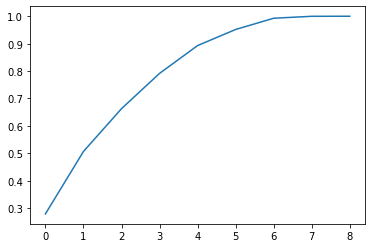

In [86]:
#Visualizing the cumulative summation plot thus formed

plt.plot(np.cumsum(var))
plt.show()

# Please note: that above cumsum() plot is obtained after arranging the explained_varaince_ratio_ in DESCENDING order

# 1. From the above cumsum plot it is clear that after 6th index there is no significant increament in the cummulative explained_variance_ratio_ since beyond this point there is flatening observed in the graph. 

# 2. Therefore,  for the current wine dataset we should take Principal Components upto 6th respective indexes and these Principal Components will be treated as features of transformed dataset having the escence of original dataset which will be then used for building the learning models.

# 3. To summarize we will take these Principal Components: PC2,PC3,PC4,PC5,PC6,PC7,PC8 as the features for transformed dataset and will built our ML model on top of this transformed dataset.

# 4. Also, in the process we have removed Principal Components: PC0 and PC1 from the resultant transformed dataset. This is how dimensionality reduction is performed using the PCA approach

# =========================================
# Some Important pointers:
 - While training the model we will be providing the PCA transformed dataset and while prediction we will first of all tranform new data on which prediction needs to be made into PCA transformed data and then use the existing learning model (trained over PCA transfored train dataset) to carry out the prediction.
 
 - Means for any new data set that is not the part of the test split of exisiting dataset then we need to prepare a data pipeline that we convert this new data in PCA transformed data which will be then passed to the model for carrying out the prediction.
 
 - Again please note PCA is applicable only for numerical colums and not for categorical columns. Even if we are transforming categorical col into numeric using encoding techniques then it will generate sparse matrix(0s and 1s) which can not be taken forward for PCA.
 
 - In case dataset have many features with most of them being numeric and some of them being categorical then apply, PCA on only numerical features and generate respective PCA transformed dataset for numerical features followed by encoding only categorical features. At last just combine the PCA transformed features with encoded categorical features to generate the resultant dataset on top of which ML models can be trained.

 - In Feature Selection we are taking the subset of the features whereas, in Feature Extraction we are producing vector having essence of whole dataset with all the features